#Business Analysis

## Problem Statements
Menjelaskan pernyataan masalah latar belakang:
- **Produk dengan performa penjualan terbaik**
: Bagaimana mengidentifikasi produk kopi mana yang memiliki performa penjualan terbaik selama periode tertentu? Informasi ini penting untuk fokus pada produk yang menghasilkan pendapatan terbesar dan meningkatkan strategi pemasaran.
- **Lokasi dengan penjualan tertinggi** :
Di lokasi atau cabang mana penjualan kopi mencapai nilai tertinggi? Mengetahui lokasi dengan penjualan terbesar dapat membantu alokasi sumber daya dan pengembangan pasar secara lebih efisien.
- **Tren penjualan per hari** :
Bagaimana pola tren penjualan kopi dari hari ke hari? Dengan memahami tren ini, bisnis dapat merencanakan stok, promosi, dan operasional yang lebih optimal sesuai dengan waktu puncak penjualan.

## Goals
Menjelaskan tujuan dari pernyataan masalah:
- **Menentukan produk kopi dengan performa penjualan terbaik** :
Menghasilkan daftar produk kopi yang memiliki penjualan paling tinggi secara kuantitas dan nilai selama periode dataset, guna mendukung pengambilan keputusan produk unggulan.
- **Mengidentifikasi lokasi penjualan tertinggi** :
Menemukan cabang atau lokasi penjualan yang paling produktif, sehingga bisnis dapat fokus pada pengembangan lokasi tersebut dan memperbaiki lokasi dengan penjualan rendah.
- **Memahami tren penjualan per hari** :
Menggambarkan pola fluktuasi penjualan harian secara visual maupun statistik, untuk mengantisipasi kebutuhan stok dan merancang strategi promosi harian yang efektif.

## Solution Statements
Mengajukan 2 atau lebih solusi yang dapat dilakukan untuk mencapai goals:
- **Analisis Data Deskriptif dan Visualisasi** :
Melakukan eksplorasi data (EDA) dengan grafik batang, heatmap, dan time series untuk melihat performa produk, lokasi penjualan, dan tren harian. Ini membantu memahami pola dasar dan insight awal.
- **Segmentasi dan Klasterisasi Produk/Lokasi** :
Menggunakan metode clustering untuk mengelompokkan produk atau lokasi berdasarkan performa penjualan, sehingga dapat memudahkan identifikasi segmen unggulan dan segmen yang perlu ditingkatkan.
- **Model Prediktif Penjualan** :
Membangun model time series forecasting untuk memprediksi tren penjualan harian ke depan sehingga dapat membantu bisnis dalam perencanaan stok dan promosi yang lebih tepat.
- **Evaluasi dan Monitoring Kinerja** :
Menetapkan metrik evaluasi seperti total penjualan, rata-rata penjualan per hari, dan growth rate untuk mengukur keberhasilan strategi yang diambil berdasarkan hasil analisis.

#Data Understanding

## Data Understanding
- **Jumlah Data:** 149.116 baris dan 11 kolom
- **Kondisi Data:**
  - Tidak ada missing value.
  - Tidak ada data duplikat.
  - Ditemukan outlier pada `transaction_qty` dan `unit_price`, sebagian dibersihkan menggunakan metode IQR.
- **Sumber Dataset:** [Kaggle - Coffee Sales Dataset](https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales)
- **Deskripsi Fitur:**
  - `transaction_id`: ID unik tiap transaksi
  - `transaction_date`: Tanggal transaksi
  - `transaction_time`: Waktu transaksi
  - `transaction_qty`: Jumlah produk yang dibeli
  - `store_id`: ID toko
  - `store_location`: Lokasi toko
  - `product_id`: ID produk
  - `unit_price`: Harga satuan
  - `product_category`: Kategori produk
  - `product_type`: Tipe produk
  - `product_detail`: Detail produk

## Exploratory Data Analysis
Untuk memahami data lebih lanjut, beberapa teknik EDA yang bisa dilakukan antara lain:
- Visualisasi distribusi jumlah transaksi per tanggal untuk melihat tren musiman atau harian penjualan.
- Analisis frekuensi penjualan per produk dan kategori untuk mengidentifikasi produk unggulan.
- Pemetaan penjualan berdasarkan store_location untuk menemukan lokasi dengan performa terbaik.
- Statistik deskriptif terhadap variabel kuantitatif seperti transaction_qty dan unit_price untuk melihat rata-rata, median, dan variabilitas penjualan.

Dengan memahami struktur dan isi dataset ini, langkah selanjutnya adalah melakukan pra-pemrosesan data untuk memastikan kualitas data dan kesesuaian dengan kebutuhan analisis. Berikut adalah tahapan keseluruhan dari predictive analysis pada coffee shop;
1. Business Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preprocessing
5. Data Modeling

#Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alvinaaulianisa","key":"563f61499ee8701869000c7e54afaccf"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ahmedabbas757/coffee-sales
!unzip coffee-sales.zip -d coffee-sales

Dataset URL: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales
License(s): GNU Lesser General Public License 3.0
  0% 0.00/8.23M [00:00<?, ?B/s]
100% 8.23M/8.23M [00:00<00:00, 833MB/s]
Archive:  coffee-sales.zip
  inflating: coffee-sales/Coffee Shop Sales.xlsx  


In [4]:
df = pd.read_excel('coffee-sales/Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


**Insight:**
- Terdapat 1 kolom bertipe float dan 4 kolom bertipe integer, sehingga total terdapat 5 kolom data yang memiliki tipe data numeric (transaction_id, transaction_qty, store_id, product_id, dan unit_price).
- Terdapat 5 kolom bertipe object yaitu transaction_time, store_location, product_category, product_type, dan product_detail.
- Terdapat 1 kolom bertipe data datetime yaitu transaction_date.
- Pada kolom transaction_time seharusnya memilik tipe data datetime agar mudah diproses dan dimanipulasi secara efisien.

#Exploratory Data Analysis

##Deskripsi Variabel

In [6]:
df.describe(include='all')

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
count,149116.000000,149116,149116,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116,149116,149116
unique,NaN,NaN,25762,NaN,NaN,3,NaN,NaN,9,29,80
top,NaN,NaN,09:31:15,NaN,NaN,Hell's Kitchen,NaN,NaN,Coffee,Brewed Chai tea,Chocolate Croissant
freq,NaN,NaN,41,NaN,NaN,50735,NaN,NaN,58416,17183,3076
mean,74737.371872,2023-04-15 11:50:32.173609984,NaN,1.438276,5.342063,NaN,47.918607,3.382219,NaN,NaN,NaN
min,1.000000,2023-01-01 00:00:00,NaN,1.000000,3.000000,NaN,1.000000,0.800000,NaN,NaN,NaN
25%,37335.750000,2023-03-06 00:00:00,NaN,1.000000,3.000000,NaN,33.000000,2.500000,NaN,NaN,NaN
50%,74727.500000,2023-04-24 00:00:00,NaN,1.000000,5.000000,NaN,47.000000,3.000000,NaN,NaN,NaN
75%,112094.250000,2023-05-30 00:00:00,NaN,2.000000,8.000000,NaN,60.000000,3.750000,NaN,NaN,NaN
max,149456.000000,2023-06-30 00:00:00,NaN,8.000000,8.000000,NaN,87.000000,45.000000,NaN,NaN,NaN


In [7]:
df.dtypes

,0
transaction_id,int64
transaction_date,datetime64[ns]
transaction_time,object
transaction_qty,int64
store_id,int64
store_location,object
product_id,int64
unit_price,float64
product_category,object
product_type,object


##Menangani Missing Values

In [8]:
price = (df.unit_price == 0).sum()
quantity = (df.transaction_qty == 0).sum()

print("Nilai 0 di kolom unit_price ada: ", price)
print("Nilai 0 di kolom transaction_qty ada: ", quantity)

Nilai 0 di kolom unit_price ada:  0
Nilai 0 di kolom transaction_qty ada:  0


In [9]:
print("Banyak duplikasi di dalam dataset: ", df.duplicated().sum())
print("Jumlah missing value di dalam dataset: ", df.isna().sum().sum())

Banyak duplikasi di dalam dataset:  0
Jumlah missing value di dalam dataset:  0


**Insight:**
- Berdasarkan hasil code di atas, tidak terdapat missing values maupun duplikasi pada kolom numeric unit_price dan transaction_qty yang dapat memengaruhi proses analisis selanjutnya.

##Menangani Outliers

<Axes: xlabel='transaction_qty'>

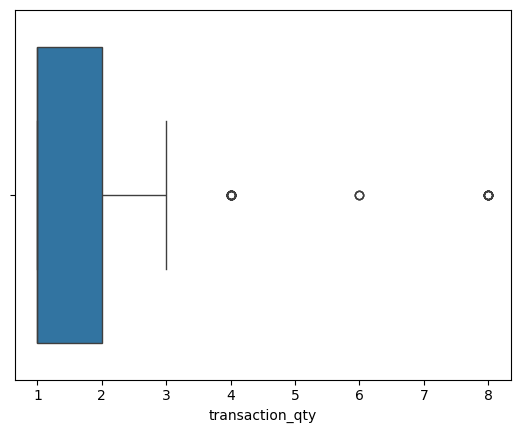

In [10]:
sns.boxplot(x=df['transaction_qty'])

**Insight:**
- Berdasarkan visualisasi boxplot di atas, kolom transaction_qty hanya memiliki sedikit outlier yang mana hal tersebut cukup wajar terjadi karena bisa saja terdapat beberapa orang yang membeli produk coffee dengan jumlah yang banyak di atas jumlah pembelian pada umumnya (bisa saja untuk acara tertentu dengan audiens yang banyak)

<Axes: xlabel='unit_price'>

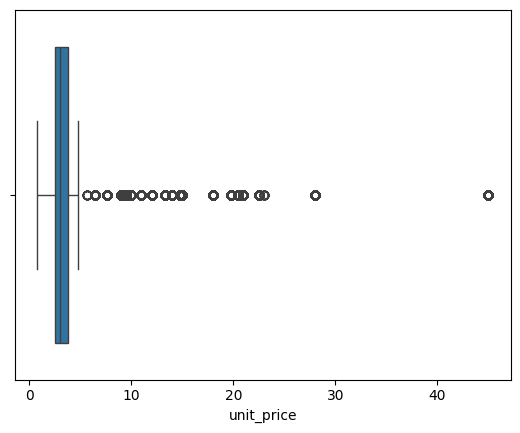

In [11]:
sns.boxplot(x=df['unit_price'])

**Insight:**
- Berdasarkan visualisasi di atas, boxplot menunjukkan bahwa pada kolom unit_price memiliki cukup banyak outliers. Namun outliers tersebut perlu dipastikan terlebih dahulu apakah outliers tersebut ada karena kekeliruan teknis atau bukan, karena outlier pada unit_price (harga produk) itu adalah hal yang wajar dan bahkan diharapkan dalam domain produk yang beragam karena terkadang terdapat beberapa produk yang memiliki harga mahal atau ekslusif sehingga terdeteksi sebagai outlier.

In [12]:
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[filter_outliers]

df.shape

(144883, 11)

##Univariate Analysis

In [13]:
numerical_features = ['transaction_qty', 'unit_price']
categorical_features = ['product_category', 'product_type', 'product_detail', 'store_location']

                 jumlah sampel  persentase
transaction_qty                           
1                        82975        57.3
2                        58629        40.5
3                         3279         2.3


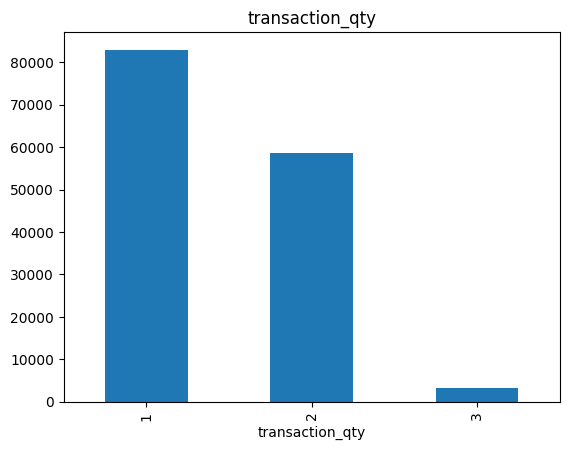

In [14]:
feature = numerical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
category_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(category_samples)
count.plot(kind='bar', title=feature);

***Insight:***
- Mayoritas transaksi (lebih dari 80.000) melibatkan pembelian hanya 1 item, disusul dengan pembelian 2 item.
- Hanya sebagian kecil pelanggan yang membeli 3 item sekaligus.
- Pola ini menunjukkan bahwa pembelian spontan/individual sangat dominan, tipikal behavior pelanggan coffee shop (takeaway/personal use).
- Strategi marketing seperti promo bundling (beli 2 gratis 1) atau diskon pembelian kedua dapat mendorong peningkatan kuantitas per transaksi.

            jumlah sampel  persentase
unit_price                           
3.00                33703        23.3
2.50                26346        18.2
3.75                18481        12.8
3.50                13728         9.5
0.80                 6771         4.7
3.25                 6060         4.2
4.25                 5666         3.9
2.00                 5647         3.9
2.20                 5647         3.9
3.10                 5545         3.8
4.50                 4966         3.4
4.75                 2961         2.0
4.00                 2830         2.0
2.55                 2705         1.9
2.45                 2630         1.8
2.10                  750         0.5
2.65                  284         0.2
4.06                   66         0.0
4.38                   55         0.0
4.69                   42         0.0


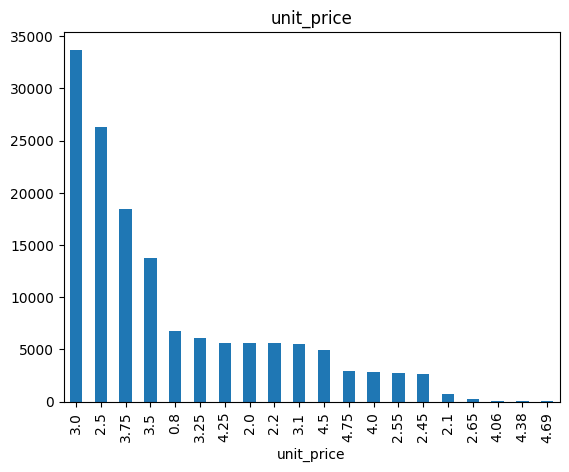

In [15]:
feature = numerical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
category_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(category_samples)
count.plot(kind='bar', title=feature);

**Insight:**
- Harga unit terbanyak berada di kisaran 3.00 hingga 3.75 menunjukkan preferensi pelanggan terhadap harga terjangkau.
- Produk dengan harga premium (di atas 4.50) hanya sedikit jumlahnya dan frekuensinya sangat rendah.
- Ini menunjukkan bahwa mayoritas pelanggan sensitif terhadap harga, dan strategi harga harus tetap kompetitif di kisaran 3-4.
- Produk dengan harga sangat rendah (0.80) kemungkinan adalah tambahan/side item, tapi perlu dikaji apakah masih relevan secara bisnis.

                    jumlah sampel  persentase
product_category                             
Coffee                      58414        40.3
Tea                         45449        31.4
Bakery                      22781        15.7
Drinking Chocolate          11468         7.9
Flavours                     6771         4.7


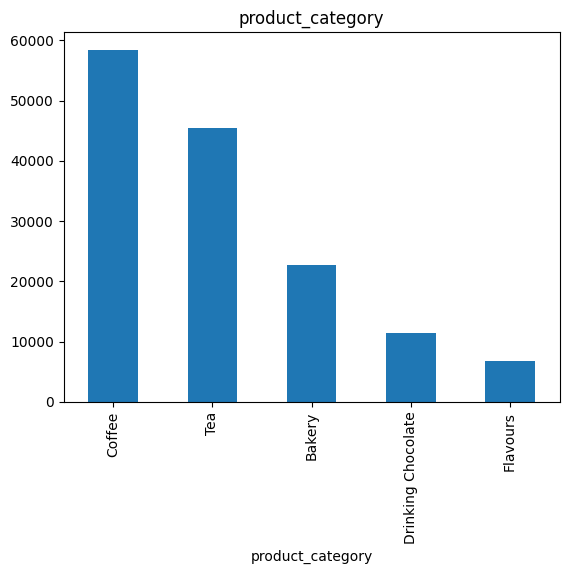

In [16]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
category_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(category_samples)
count.plot(kind='bar', title=feature);

***Insight:***
- Kategori Coffee mendominasi penjualan dengan 58.000 transaksi diikuti oleh Tea (46.000) dan Bakery (23.000).
- Flavours dan Drinking Chocolate menempati posisi terbawah.
- Hal ini menegaskan bahwa kopi merupakan core business dari coffee shop ini. Produk pelengkap seperti teh dan roti mendukung namun bukan kontributor utama.
- Strategi penjualan bisa fokus pada penguatan produk kopi sambil memposisikan kategori lain sebagai upsell.

                       jumlah sampel  persentase
product_type                                    
Brewed Chai tea                17183        11.9
Gourmet brewed coffee          16912        11.7
Barista Espresso               16401        11.3
Hot chocolate                  11468         7.9
Brewed Black tea               11350         7.8
Brewed herbal tea              11245         7.8
Scone                          10158         7.0
Organic brewed coffee           8489         5.9
Drip coffee                     8477         5.9
Premium brewed coffee           8135         5.6
Pastry                          6912         4.8
Biscotti                        5711         3.9
Brewed Green tea                5671         3.9
Regular syrup                   4968         3.4
Sugar free syrup                1803         1.2


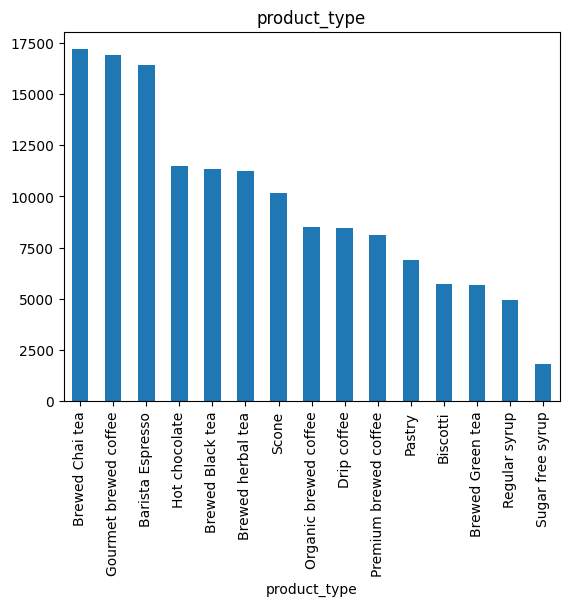

In [17]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
product_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(product_samples)
count.plot(kind='bar', title=feature);

***Insight:***
- Produk terlaris adalah Brewed Chai Tea, Gourmet Brewed Coffee, dan Barista Espresso, masing-masing dengan lebih dari 16.000 transaksi.
- Produk dengan penjualan terendah adalah Sugar Free Syrup dan Regular Syrup, menandakan minat pelanggan sangat rendah pada tambahan rasa/flavour.
- Fokus promosi dan stok sebaiknya diarahkan pada produk-produk minuman utama, sedangkan produk dengan penjualan rendah bisa dievaluasi ulang untuk penghapusan atau bundling.

                              jumlah sampel  persentase
product_detail                                         
Chocolate Croissant                    3076         2.1
Earl Grey Rg                           3053         2.1
Dark chocolate Lg                      3029         2.1
Morning Sunrise Chai Rg                3026         2.1
Columbian Medium Roast Rg              3013         2.1
Latte                                  2990         2.1
Sustainably Grown Organic Lg           2961         2.0
Traditional Blend Chai Rg              2955         2.0
Spicy Eye Opener Chai Lg               2951         2.0
Peppermint Rg                          2949         2.0
Serenity Green Tea Rg                  2921         2.0
Our Old Time Diner Blend Sm            2919         2.0
Jamaican Coffee River Lg               2911         2.0
Brazilian Rg                           2904         2.0
Latte Rg                               2896         2.0
Our Old Time Diner Blend Rg            2894     

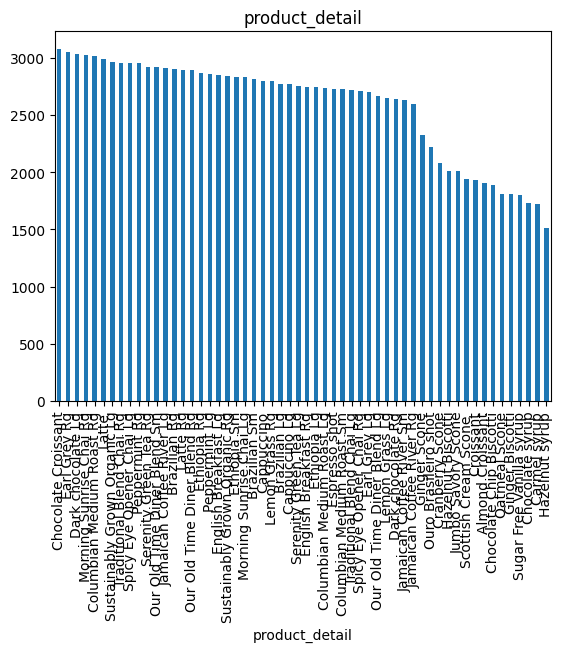

In [18]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
detail_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(detail_samples)
count.plot(kind='bar', title=feature);

**Insight:**
- Produk dengan detail tertinggi dalam jumlah transaksi adalah Chocolate Croissant, Colombian Medium Roast, dan Morning Roast, masing-masing dengan lebih dari 3.000 transaksi. Ini menunjukkan bahwa varian roti coklat dan kopi medium roast sangat populer.
- Pola distribusi terlihat cukup merata untuk 30–40 produk teratas, namun kemudian menurun tajam pada produk-produk lainnya.
- Produk-produk seperti Hazelnut, Sugar Free Vanilla Syrup, dan beberapa varian sirup lainnya memiliki jumlah transaksi yang paling rendah, menunjukkan rendahnya minat pelanggan terhadap topping/flavour tambahan.
- Sebagian nama produk terlihat memiliki pola penamaan yang serupa seperti "Our Old Time Diner Blend", "Sustainable", dan "Colombian", menunjukkan kemungkinan adanya segmentasi berdasarkan tema atau asal produk. Segmentasi ini bisa dimanfaatkan untuk strategi branding atau bundling berdasarkan preferensi pelanggan.
- Banyaknya varian produk yang berbeda tetapi memiliki jumlah transaksi rendah bisa menjadi tanda perlunya rasionalisasi produk misalnya, memangkas varian yang tidak populer agar operasional dan inventori lebih efisien.

                 jumlah sampel  persentase
store_location                            
Astoria                  49364        34.1
Hell's Kitchen           49214        34.0
Lower Manhattan          46305        32.0


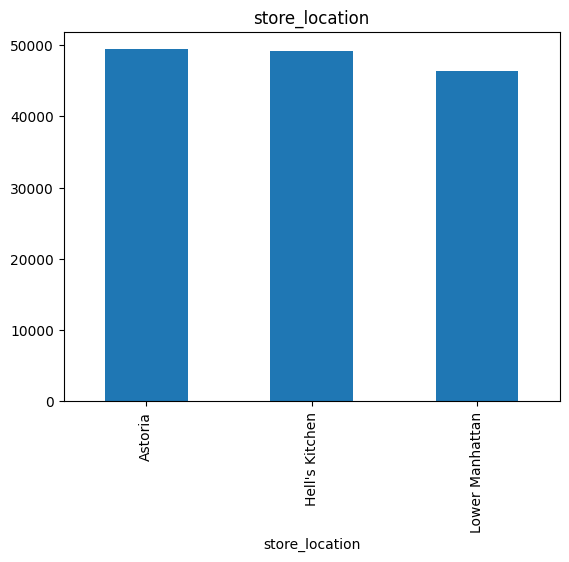

In [19]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
store_samples = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(store_samples)
count.plot(kind='bar', title=feature);

**Insight:**
- Jumlah transaksi pada tiga lokasi relatif seimbang dengan Astoria dan Hell's Kitchen memiliki jumlah transaksi tertinggi (~49.000).
- Lower Manhattan sedikit lebih rendah (~46.000) yang bisa jadi karena faktor lokasi, kapasitas toko, atau perilaku pelanggan.
- Distribusi yang merata menunjukkan bahwa performa bisnis cukup stabil di ketiga lokasi namun ada peluang untuk meningkatkan kinerja Lower Manhattan agar setara.

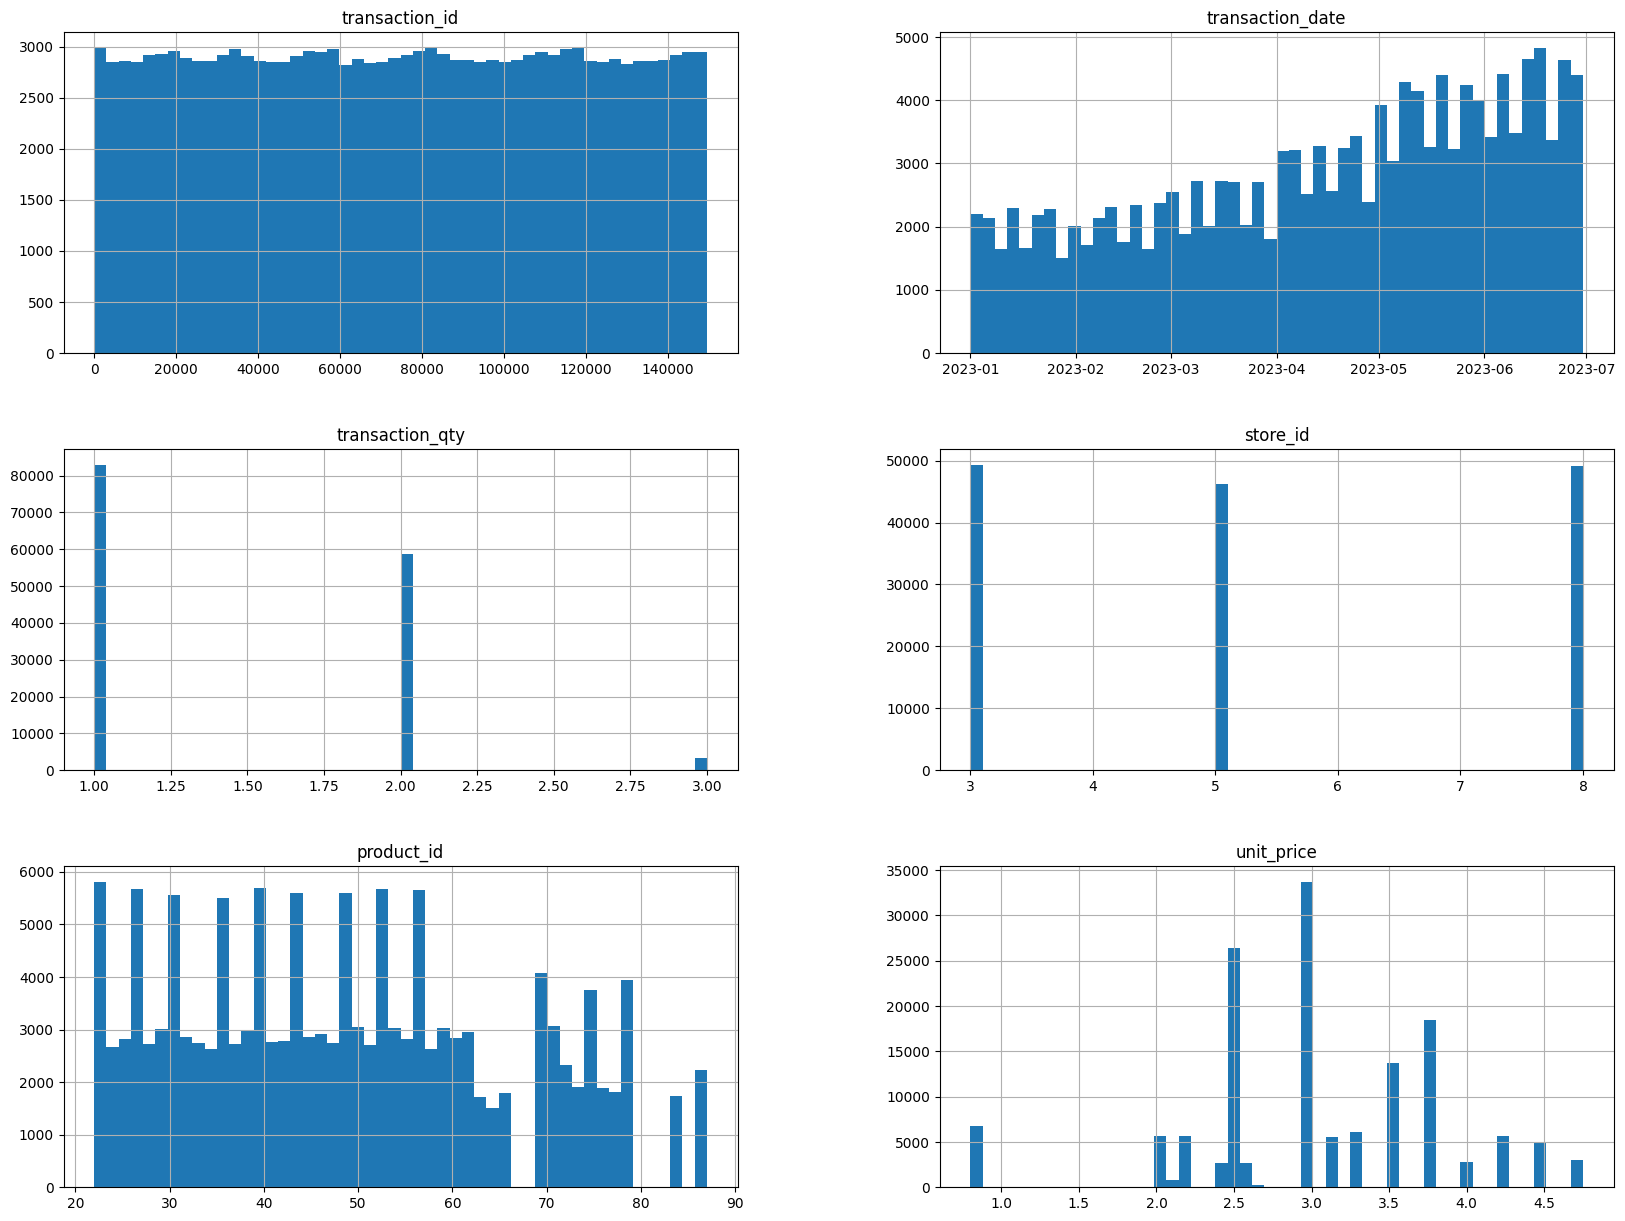

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:**
- Gambar ini menampilkan distribusi beberapa variabel dalam ```dataset transaksi```, termasuk ```transaction_id```, ```transaction_date```, ```transaction_qty```, ```product_id```, ```store_id```, dan ```unit_price```.
- ```transaction_qty``` berkisar antara 1.00 hingga 3.00, menunjukkan bahwa sebagian besar transaksi melibatkan jumlah produk yang relatif kecil.
- ```product_id``` dan ```store_id``` memiliki rentang nilai yang bervariasi, mengindikasikan keberagaman produk dan toko dalam dataset.
- ```unit_price``` tidak ditampilkan secara eksplisit dalam grafik tetapi kemungkinan merupakan salah satu variabel yang dianalisis.

##Multivariate Analysis

In [21]:
df = df.copy()
df['sales_amount'] = df['transaction_qty'] * df['unit_price']
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['month'] = df['transaction_date'].dt.month
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

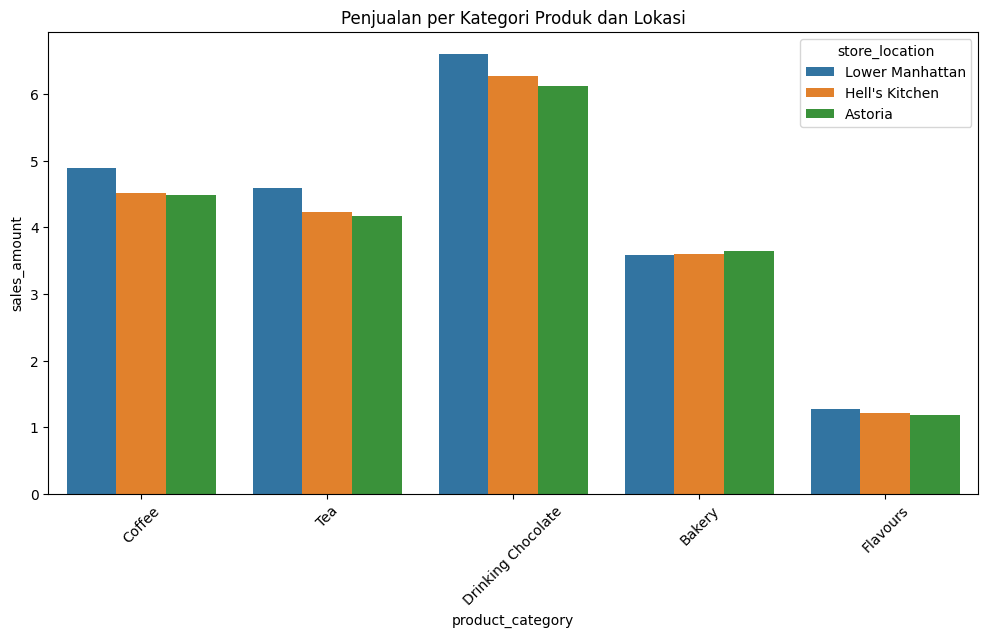

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product_category', y='sales_amount', hue='store_location', errorbar=None)
plt.xticks(rotation=45)
plt.title("Penjualan per Kategori Produk dan Lokasi")
plt.show()

**Insight:**
- Lower Manhattan memiliki sales_amount tertinggi dibeberapa kategori produk terutama pada product dengan kategori **Drinking Chocolate**, dan tingginya sales_amount ini bisa saja dikarenakan kepadatan penduduk atau lalu lintas pelanggan yang tinggi (daerah perkantoran/turis).
- Hell's Kitchen dan Astoria menunjukkan pola penjualan berbeda yang mungkin karena demografi atau daya beli pelanggan. Namun penjualan dibeberapa kategori masih unggul ketimbang dengan penjualan di store Astoria.
- Astoria memiliki sales_amount terendah daripada store lainnya dibeberapa kategori, namun Astoria memiliki sales_amount tertinggi daripada yang lainnya pada kategori **Bakery**.

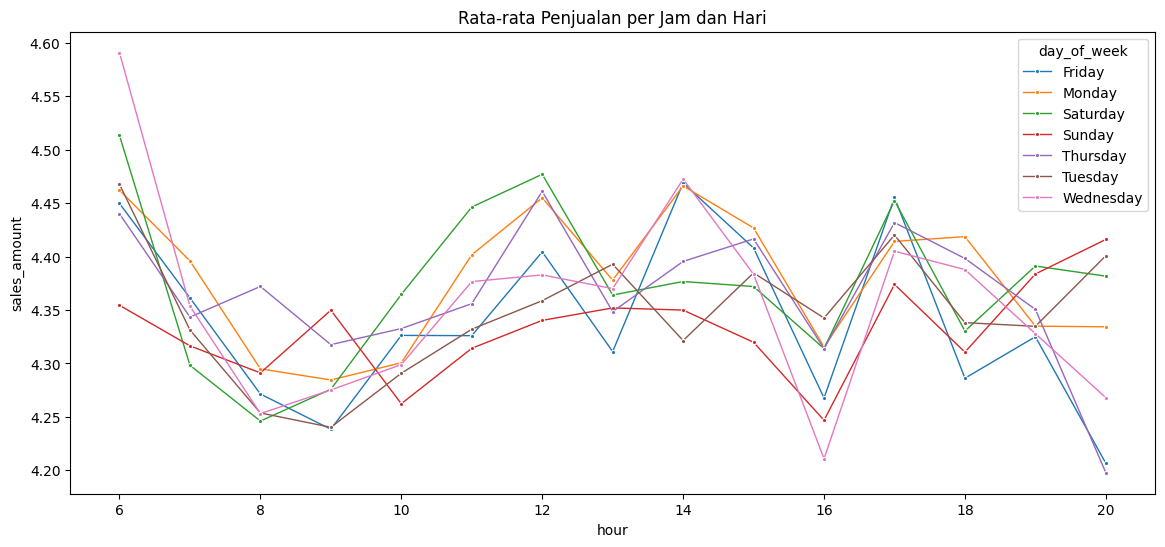

In [23]:
avg_hourly = df.groupby(['hour', 'day_of_week'])['sales_amount'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_hourly, x='hour', y='sales_amount', hue='day_of_week', marker='.', linewidth=1)
plt.title("Rata-rata Penjualan per Jam dan Hari")
plt.show()

**Insight:**
- Semua lokasi menunjukkan fluktuasi serupa sepanjang hari, dengan puncak sekitar jam 12-14 dan transaksi terendah terjadi di pagi hari (jam 6-8) dan malam (jam 18-20).
- Lower Manhattan memiliki rata-rata transaksi tertinggi (sekitar 1.50-1.55 di jam sibuk) dan puncak jelasnya di jam 12-14 (waktu makan siang).
- Hell's Kitchen memiliki tren mirip Lower Manhattan tetapi dengan nilai lebih rendah (1.45-1.50) dan terjadi lonjakan kecil di jam 18-20 (aktivitas malam).
- Astoria memiliki transaksi paling rendah (1.35-1.40) tanpa lonjakan signifikan.

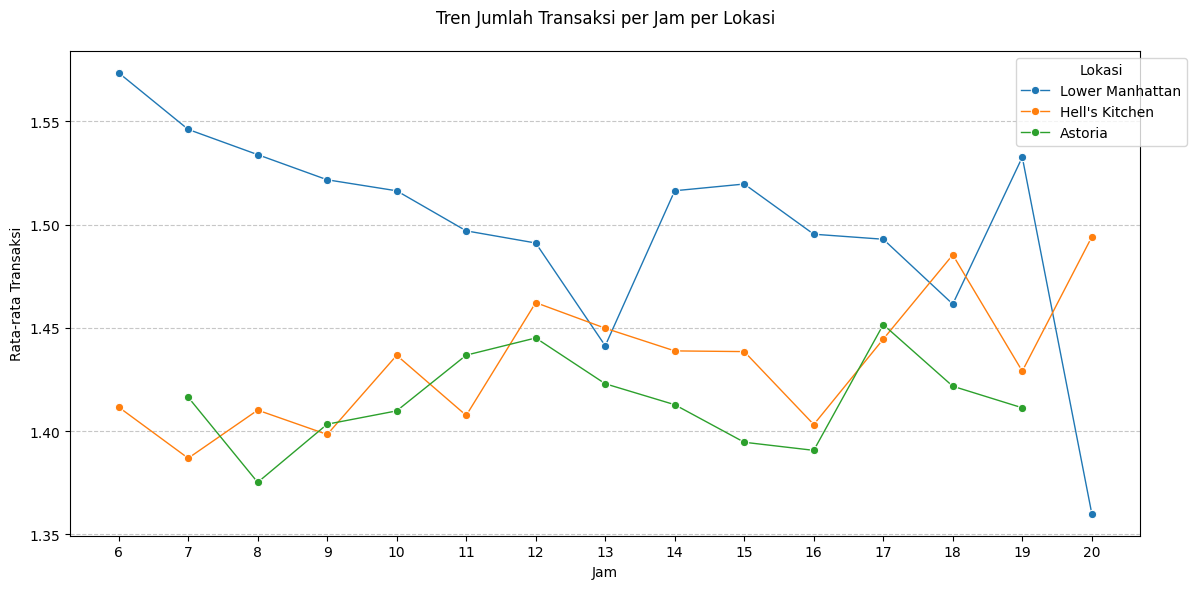

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='hour',
    y='transaction_qty',
    hue='store_location',
    marker='o',
    errorbar=None,
    linewidth=1
)
plt.title("Tren Jumlah Transaksi per Jam per Lokasi", pad=20)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Transaksi")
plt.xticks(range(6, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Lokasi', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Insight:**
- Pada weekdays (Senin-Jumat) puncak penjualan terjadi pada jam 12-14 (rata-rata ~4.50-4.60) dan penurunan signifikan setelah jam 15.
- Pada weekend (Sabtu-Minggu) penjualan lebih tinggi sepanjang hari (terutama Sabtu) dan puncak lebih lebar (jam 11-16).
- Perbedaan pada saat jam pagi (6-10) penjualan cenderung rendah (~4.20–4.30) kecuali pada hari Sabtu. Pada saat malam (18-20) penjualan tetap rendah bahkan di weekend.

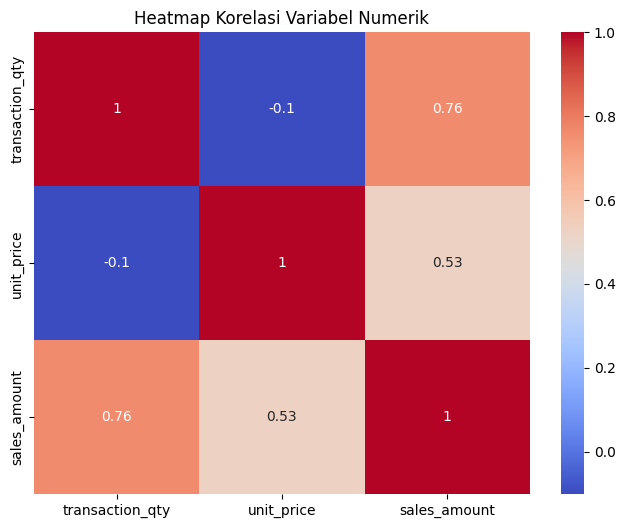

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['transaction_qty', 'unit_price', 'sales_amount']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

**Insight:**
- Korelasi antara transaction_qty (jumlah transaksi) dan sales_amount (total penjualan) sangat kuat dengan nilai 0.76 (nilai mendekati 1) yang artinya peningkatan jumlah transaksi langsung berdampak pada peningkatan pendapatan.
- Korelasi price (harga) dengan sales_amount mungkin lemah atau negatif. Jika harga terlalu tinggi maka jumlah transaksi bisa menurun karena pelanggan lebih sensitif terhadap harga.

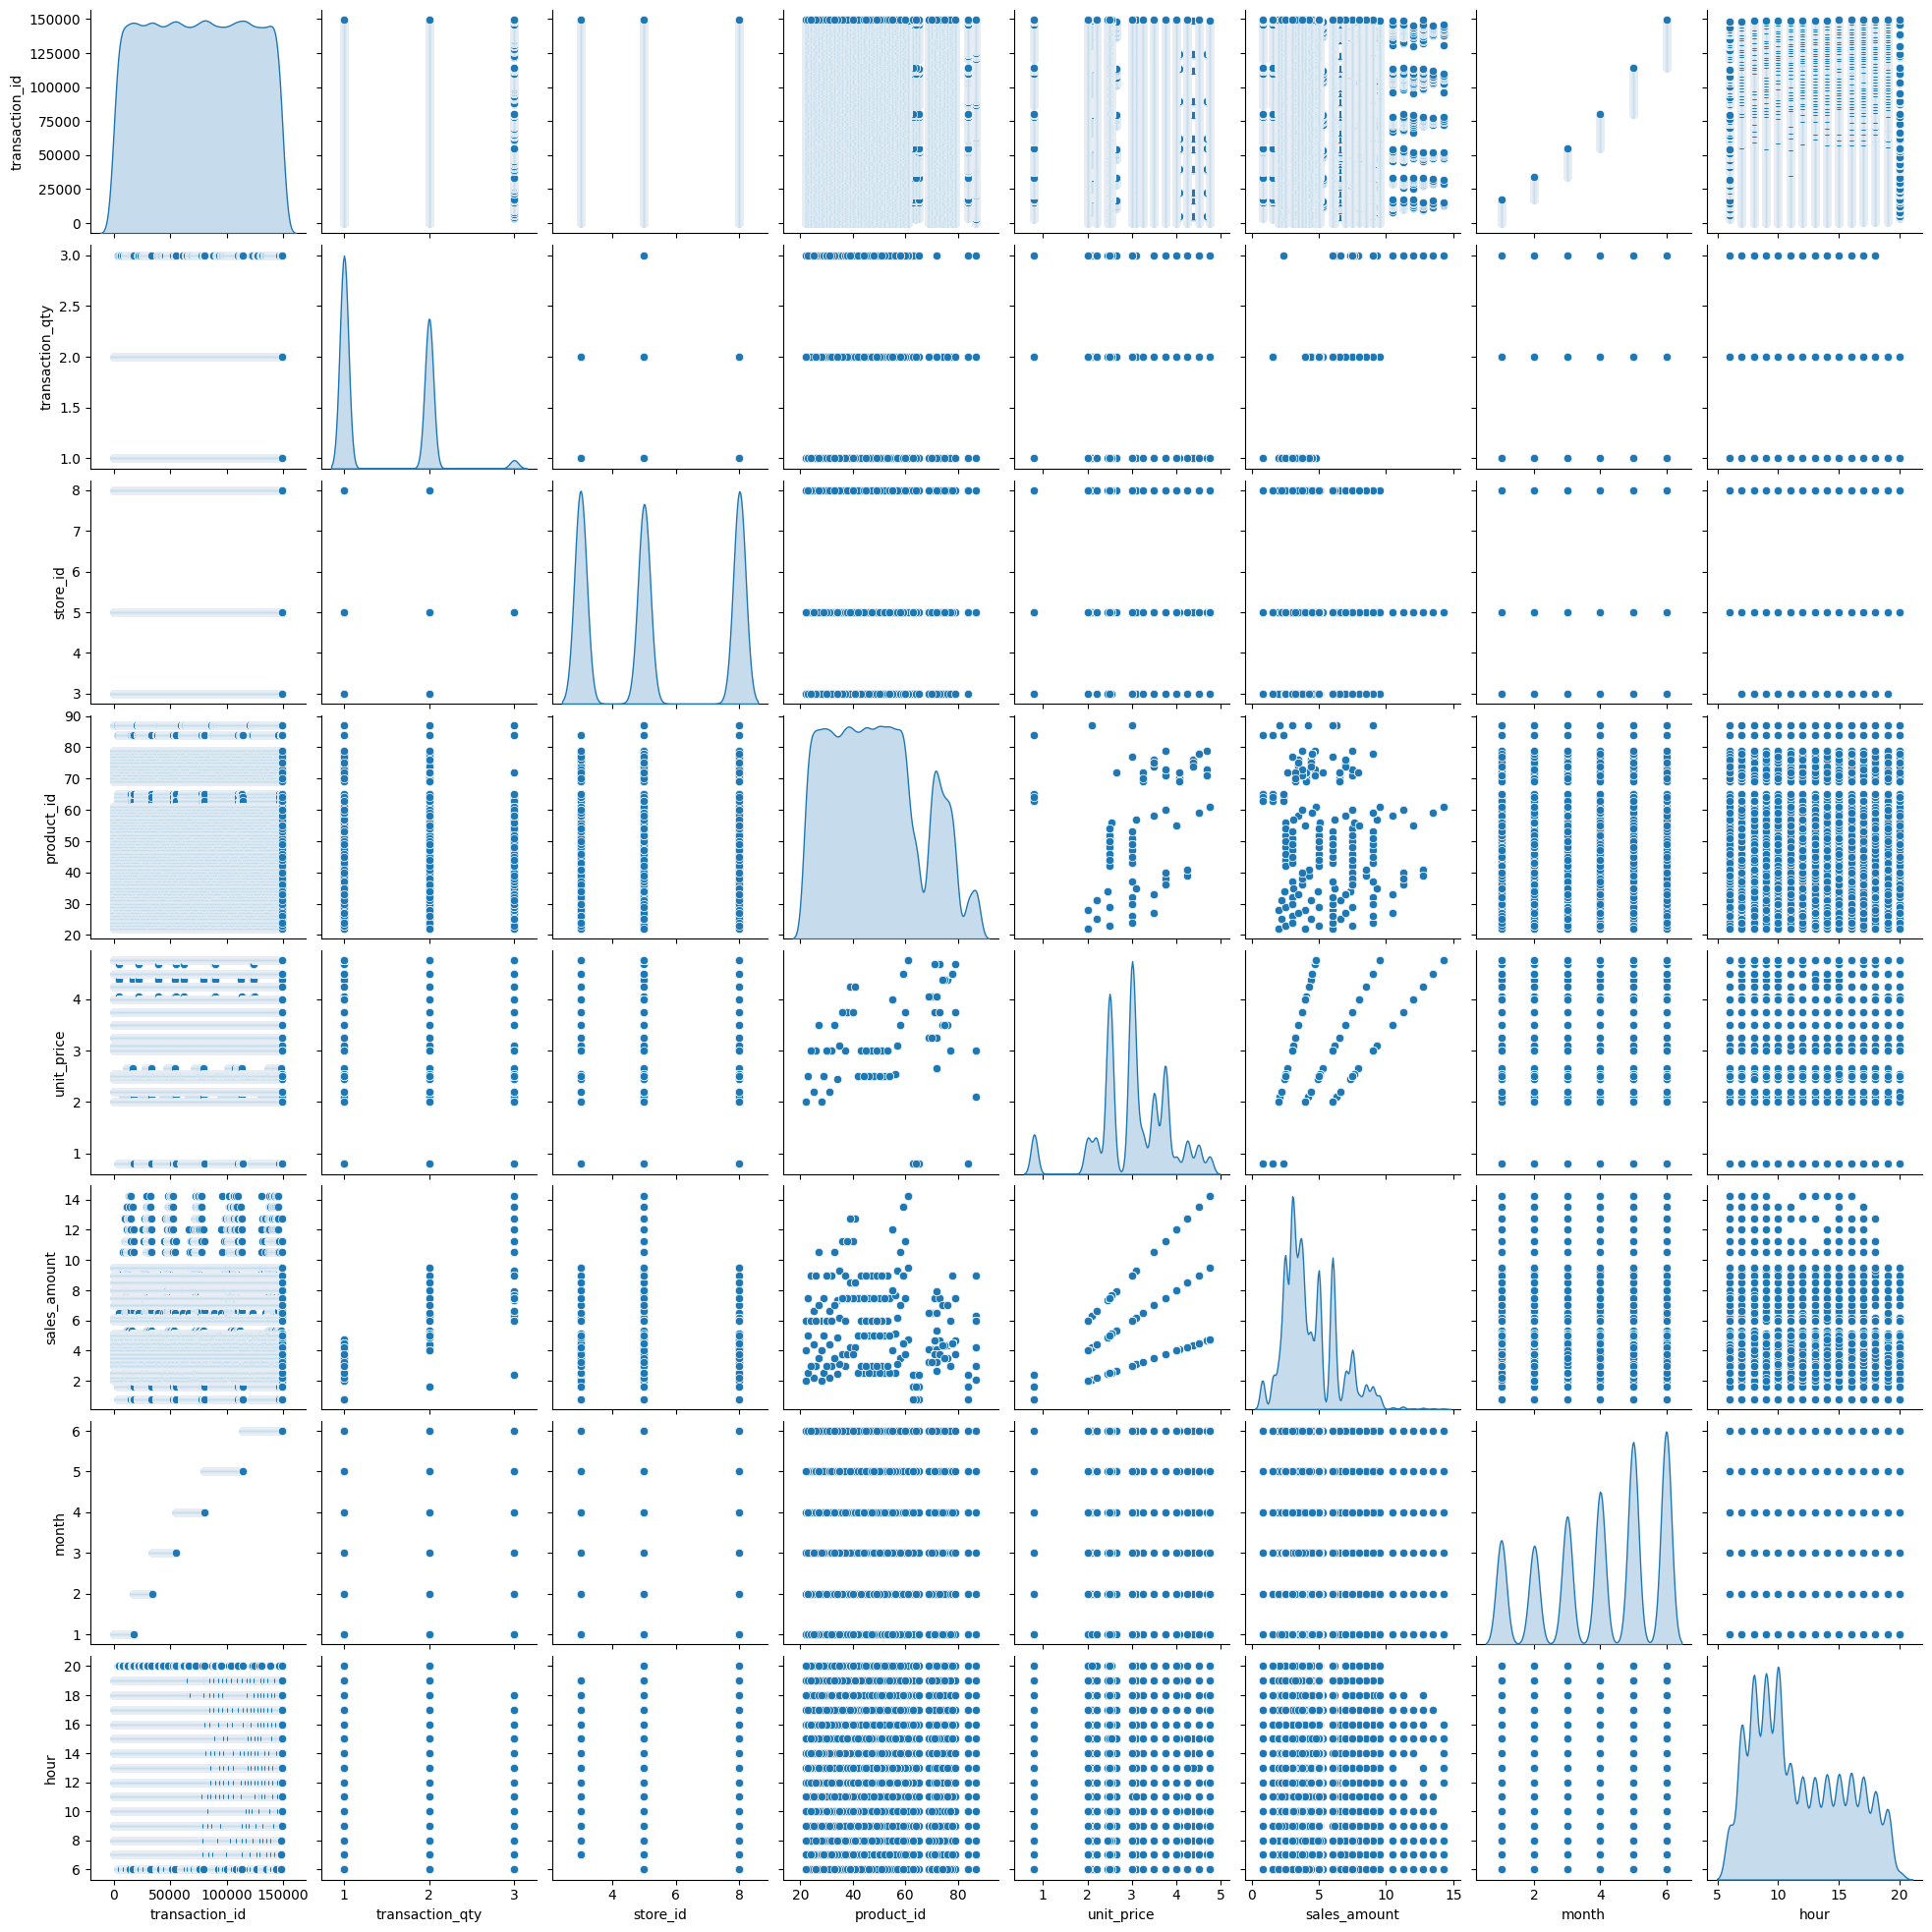

In [26]:
sns.pairplot(df, diag_kind = 'kde')

**Insight:**
- Matriks plot pencar mengungkapkan beberapa hubungan penting antar variabel. Terlihat adanya pola musiman (terlihat pada plot bulan) dan efek waktu dalam sehari (variabel jam).
- Akurasi prediksi model menurun saat nilai penjualan aktual meningkat dengan prediksi yang mengelompok di sekitar rentang 4-7 terlepas dari nilai aktual yang melebihi 10.
- Terdapat varian signifikan dalam akurasi prediksi di berbagai ID produk dan kuantitas transaksi menunjukkan bahwa variabel-variabel ini mungkin memerlukan representasi yang lebih baik dalam model.
- Data menunjukkan beberapa kelompok terpisah dalam prediksi penjualan mengindikasikan adanya peluang segmentasi yang dapat meningkatkan akurasi peramalan jika dimodelkan secara terpisah.
- Distribusi transaksi sepanjang bulan menunjukkan pola siklus yang dapat dimanfaatkan untuk prediksi musiman yang lebih akurat.
- Kuantitas transaksi tampaknya memiliki hubungan positif namun non-linear dengan jumlah penjualan menunjukkan potensi untuk rekayasa fitur untuk menangkap hubungan ini dengan lebih baik.

<Axes: xlabel='sales_amount', ylabel='Count'>

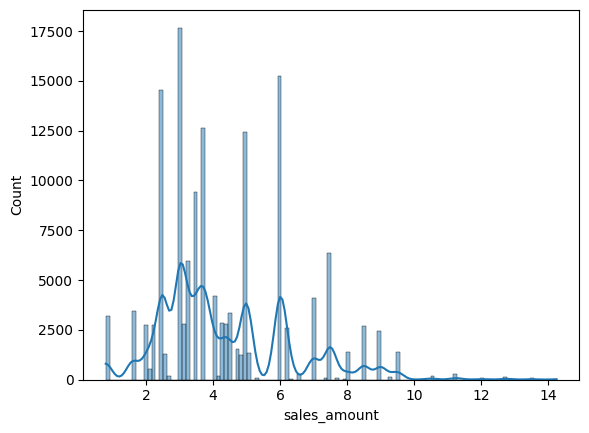

In [27]:
sns.histplot(df['sales_amount'], kde=True)

**Insight:**
- Grafik ini menampilkan distribusi ```sales_amount``` dengan sumbu y menunjukkan frekuensi (Count) dan sumbu x menunjukkan nilai penjualan.
- Sebagian besar transaksi memiliki nilai penjualan di bawah 5000 dengan frekuensi tertinggi berada pada rentang 0-2500.
- Ada beberapa outlier dengan nilai penjualan sangat tinggi (hingga 17500) yang mungkin merupakan transaksi besar atau data yang tidak biasa.

#Data Preparation

In [28]:
df_encoded = pd.get_dummies(df, columns=[
    'store_location', 'product_category', 'product_type', 'product_detail', 'day_of_week'
], drop_first=True)

In [29]:
df_encoded = df_encoded.drop(['transaction_id', 'transaction_date', 'transaction_time', 'transaction_datetime'], axis=1, errors='ignore')

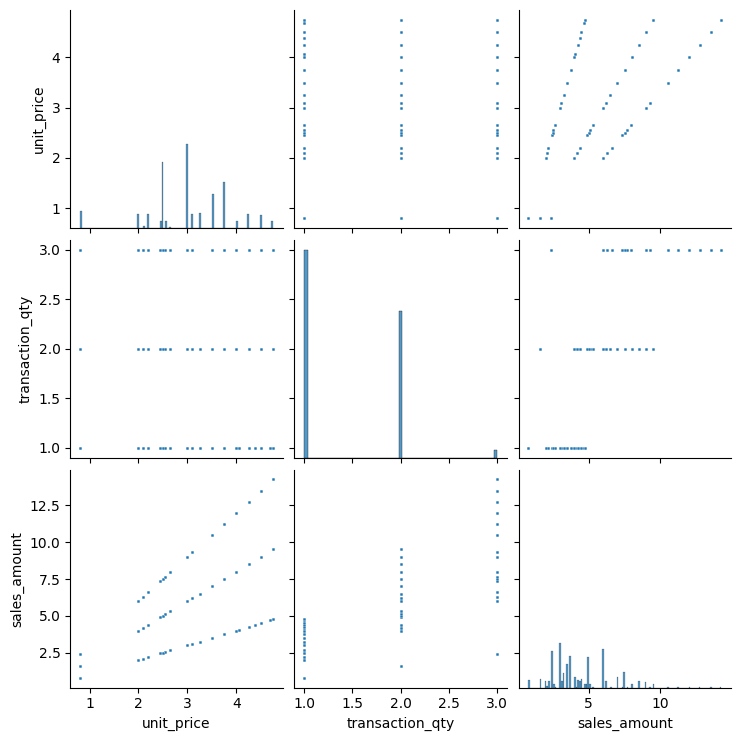

In [30]:
sns.pairplot(df[['unit_price','transaction_qty','sales_amount']], plot_kws={"s": 3});

**Insight:**  
- Dari scatter plot matrix dapat dilihat hubungan linier positif yang jelas antara ```unit_price``` dan ```sales_amount``` menunjukkan bahwa harga unit merupakan faktor penentu utama dalam jumlah penjualan. Pola ini membentuk beberapa garis diagonal pada grafik ketiga yang menunjukkan adanya beberapa level harga yang berbeda yang berhubungan dengan jumlah penjualan tertentu.
- Kuantitas transaksi (```transaction_qty```) memiliki tiga nilai dominan (1, 2, dan 3) yang terlihat dari histogram dengan distribusi penjualan yang berbeda untuk setiap nilai yang menunjukkan segmentasi alami dalam data berdasarkan jumlah item yang dibeli.
- Visualisasi pada grafik ketiga menunjukkan bahwa hubungan antara ```transaction_qty``` dan ```sales_amount``` tidak sepenuhnya linier dan terdapat variasi yang signifikan dalam sales_amount bahkan untuk nilai ```transaction_qty``` yang sama mengindikasikan adanya faktor-faktor lain yang mempengaruhi nilai penjualan.

In [31]:
store_summary = df.groupby('store_id').agg({
    'sales_amount': 'sum',
    'transaction_qty': 'sum',
    'product_id': 'nunique',
    'transaction_id': 'count'
}).rename(columns={
    'product_id': 'unique_products',
    'transaction_id': 'num_transactions'
})

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(store_summary)
x_pca = PCA(n_components=2)
components = x_pca.fit_transform(X)

In [33]:
x_pca.explained_variance_ratio_.round(3)

array([0.849, 0.151])

**Insight:**
- Dari hasil ```explained_variance_ratio_``` dua komponen utama tersebut mampu menjelaskan 84.9% dan 15.1% variasi total data secara berurutan sehingga kedua komponen ini bersama-sama menjelaskan sekitar 100% variasi data.
- Ini menunjukkan bahwa dua komponen utama cukup efektif untuk merepresentasikan data asli dengan kehilangan informasi yang minimal sehingga bisa digunakan untuk visualisasi atau analisis lebih lanjut dengan dimensi yang lebih kecil.

In [34]:
df_model = df.copy()

df_model['sales_amount'] = df_model['transaction_qty'] * df_model['unit_price']
df_model['day_of_week'] = df_model['transaction_date'].dt.day_name()
df_model['month'] = df_model['transaction_date'].dt.month
df_model['hour'] = pd.to_datetime(df_model['transaction_time'], format='%H:%M:%S').dt.hour

df_model['is_weekend'] = df_model['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df_model['time_of_day'] = pd.cut(df_model['hour'],
                                bins=[0, 9, 14, 18, 24],
                                labels=['Morning', 'Midday', 'Afternoon', 'Evening'])

le_store = LabelEncoder()
le_product_cat = LabelEncoder()
le_product_type = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()

df_model['store_location_encoded'] = le_store.fit_transform(df_model['store_location'])
df_model['product_category_encoded'] = le_product_cat.fit_transform(df_model['product_category'])
df_model['product_type_encoded'] = le_product_type.fit_transform(df_model['product_type'])
df_model['day_of_week_encoded'] = le_day.fit_transform(df_model['day_of_week'])
df_model['time_of_day_encoded'] = le_time.fit_transform(df_model['time_of_day'])

feature_columns = [
    'store_id', 'product_id',
    'store_location_encoded', 'product_category_encoded',
    'product_type_encoded', 'day_of_week_encoded', 'month', 'hour',
    'is_weekend', 'time_of_day_encoded'
]

X = df_model[feature_columns]
y = df_model['sales_amount']

print("Features yang digunakan:", feature_columns)
print("Target variable: sales_amount")
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Features yang digunakan: ['store_id', 'product_id', 'store_location_encoded', 'product_category_encoded', 'product_type_encoded', 'day_of_week_encoded', 'month', 'hour', 'is_weekend', 'time_of_day_encoded']
Target variable: sales_amount
Shape X: (144883, 10)
Shape y: (144883,)


**Insight:**
- Jumlah data sangat besar (>140 ribu) dan fitur yang digunakan berjumlah 10 → ini cukup kuat untuk membangun model prediksi.
- Dengan ukuran data sebesar ini model machine learning seperti Gradient Boosting atau Random Forest akan mampu menangkap pola kompleks. Namun, perlu diperhatikan apakah semua fitur memiliki distribusi yang seimbang (misalnya: kategori produk atau lokasi tidak didominasi satu nilai).

## Train-Test-Split

In [35]:
y_binned = pd.qcut(y, q=5, duplicates='drop', labels=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: (115906, 10)
Test set size: (28977, 10)


**Insight:**
- Pembagian 80:20 adalah standar umum yang seimbang dalam machine learning karena cukup banyak data untuk melatih model dan menangkap pola kompleks. Cukup banyak data test untuk mengukur kinerja generalisasi model secara andal.
- Test set berisi hampir 29 ribu baris, yang memberikan estimasi performa model yang stabil dan representatif terhadap data baru (real-world prediction). Ini mengurangi kemungkinan fluktuasi besar pada metrik evaluasi (seperti MAE, RMSE, R²).
- Jika sebelumnya menggunakan stratify saat train_test_split (misalnya stratify=y_binned), maka distribusi target (misalnya sales_amount) sudah dijaga tetap proporsional di kedua subset. Hal ini memastikan model tidak bias karena distribusi target yang tidak merata.

#Model Development

### Model 1: Linear Regression
- **Cara Kerja:** Mencari hubungan linier antara fitur dan target.
- **Parameter:** Menggunakan default (fit_intercept=True, normalize=False, ...).
- **Kelebihan:** Mudah diinterpretasikan.
- **Kekurangan:** Tidak bekerja baik jika data tidak linier.

### Model 2: Random Forest
- **Cara Kerja:** Kumpulan decision tree yang digabung untuk meningkatkan akurasi.
- **Parameter:**
  - n_estimators=100
  - max_depth=5
  - min_samples_split=10
  - min_samples_leaf=5
  - max_features='sqrt'
- **Kelebihan:** Tahan terhadap overfitting.
- **Kekurangan:** Interpretasi lebih sulit dibanding model linier.

### Model 3: Gradient Boosting
- **Cara Kerja:** Menggabungkan model-model lemah secara berurutan untuk mengoreksi kesalahan sebelumnya.
- **Parameter:**
  - n_estimators=100
  - max_depth=3
  - learning_rate=0.1
  - subsample=0.8
  - min_samples_split=10
  - min_samples_leaf=5
- **Kelebihan:** Akurasi tinggi.
- **Kekurangan:** Waktu pelatihan relatif lama.

### Model 4: K-Nearest Neighbors
- **Cara Kerja:** Prediksi berdasarkan nilai target tetangga terdekat.
- **Parameter:** n_neighbors=5
- **Kelebihan:** Simpel, tidak memerlukan pelatihan.
- **Kekurangan:** Sensitif terhadap skala dan data besar.

### Model 5: Decision Tree
- **Cara Kerja:** Memetakan keputusan berdasarkan kondisi fitur.
- **Parameter:**
  - max_depth=5
  - min_samples_split=20
  - min_samples_leaf=10
- **Kelebihan:** Interpretasi mudah.
- **Kekurangan:** Mudah overfitting jika tidak dituning.


In [36]:
models = {}
results = {}

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt'
)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

gb = GradientBoostingRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    min_samples_split=10,
    min_samples_leaf=5
)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
models['K-Neighbors'] = knn

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)
dt.fit(X_train, y_train)
models['Decision Tree'] = dt

**Insight:**
- Model yang digunakan beragam mencakup model linear (Linear Regression), model berbasis pohon (Random Forest, Decision Tree, Gradient Boosting), serta model berbasis kedekatan data (K-Neighbors) sehingga dapat dibandingkan performanya dalam menangani pola hubungan fitur dengan target.
- Preprocessing bersifat selektif karena hanya LinearRegression dan KNeighborsRegressor yang dilatih dengan data yang sudah diskalakan ```(X_train_scaled)``` dan ini menunjukkan pemahaman bahwa model berbasis jarak (KNN dan model linear) sensitif terhadap skala data sedangkan model pohon tidak.
- Model tree-based telah dituning secara eksplisit pada ```max_depth, min_samples_split```, dan ```min_samples_leaf``` digunakan untuk mengendalikan kompleksitas dan menghindari overfitting khususnya pada Random Forest, Gradient Boosting, dan Decision Tree.
- Model Gradient Boosting menggunakan strategi boosting yang konservatif dengan ```learning_rate=0.1``` dan ```subsample=0.8``` menunjukkan usaha untuk mengurangi overfitting dan meningkatkan generalisasi model.
- Model disimpan dalam dictionary models yang mempermudah proses evaluasi batch atau perbandingan performa di tahap berikutnya.

In [37]:
for name, model in models.items():
    if name in ['Linear Regression', 'K-Neighbors']:
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
    else:
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Train_MAE': train_mae,
        'Train_R2': train_r2
    }


In [48]:
results_df = pd.DataFrame(results).T
results_df.round(4)

,MAE,MSE,RMSE,R2,Train_MAE,Train_R2
Linear Regression,1.5407,3.6525,1.9111,0.0627,1.5398,0.0637
Random Forest,1.3574,2.7608,1.6616,0.2915,1.3526,0.2963
Gradient Boosting,1.3298,2.4442,1.5634,0.3727,1.3259,0.3750
K-Neighbors,1.3766,3.1343,1.7704,0.1956,1.1188,0.4572
Decision Tree,1.3371,2.6540,1.6291,0.3189,1.3300,0.3242


**Insight:**
- Gradient Boosting memberikan performa terbaik secara keseluruhan berdasarkan nilai evaluasi di data uji dengan nilai RMSE terendah (1.5634) dan R² tertinggi (0.3727). Ini menunjukkan model ini mampu menangkap pola data dengan baik, tanpa overfitting, karena perbedaan kinerja antara data latih dan data uji cukup kecil.
- Linear Regression memberikan performa terburuk dengan nilai R² hanya 0.0627 yang menunjukkan bahwa model ini hampir tidak mampu menjelaskan variabilitas target. Meskipun error-nya ```(MAE, RMSE)``` cukup dekat antara data latih dan uji (indikasi tidak overfit), kualitas prediksinya secara keseluruhan rendah.
- K-Neighbors memiliki perbedaan performa signifikan antara data latih dan data uji dengan R² pada data latih 0.4572 tetapi hanya 0.1956 di data uji. Ini mengindikasikan bahwa model ini cenderung overfitting—terlalu menyesuaikan pada data pelatihan.
- Random Forest dan Decision Tree menunjukkan performa yang cukup seimbang dengan R² yang lebih baik daripada Linear Regression tetapi masih di bawah Gradient Boosting. Keduanya juga tidak menunjukkan overfitting yang parah, dengan selisih R² yang kecil antara data latih dan uji.
- Gradient Boosting adalah pilihan terbaik untuk digunakan pada dataset ini diikuti oleh Random Forest karena memberikan keseimbangan terbaik antara akurasi dan generalisasi.

In [39]:
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nModel terbaik: {best_model_name}")
print(f"R² Score: {results_df.loc[best_model_name, 'R2']:.4f}")


Model terbaik: Gradient Boosting
R² Score: 0.3727


**Insight:**
- Berdasarkan nilai R² (koefisien determinasi) tertinggi pada dataframe results_df model Gradient Boosting dipilih sebagai model terbaik.
- Nilai R² sebesar 0.3727 menunjukkan bahwa model ini hanya mampu menjelaskan sekitar 37.27% variabilitas data target. Ini menunjukkan bahwa meskipun Gradient Boosting merupakan model terbaik dibandingkan model lainnya dalam eksperimen ini namun performanya masih tergolong rendah dan mungkin belum optimal untuk digunakan dalam prediksi yang akurat.


FEATURE IMPORTANCE (Gradient Boosting)
                    feature  importance
1                product_id    0.653521
3  product_category_encoded    0.171701
4      product_type_encoded    0.157645
2    store_location_encoded    0.012974
7                      hour    0.003122
0                  store_id    0.000606
9       time_of_day_encoded    0.000360
5       day_of_week_encoded    0.000043
8                is_weekend    0.000027
6                     month    0.000000


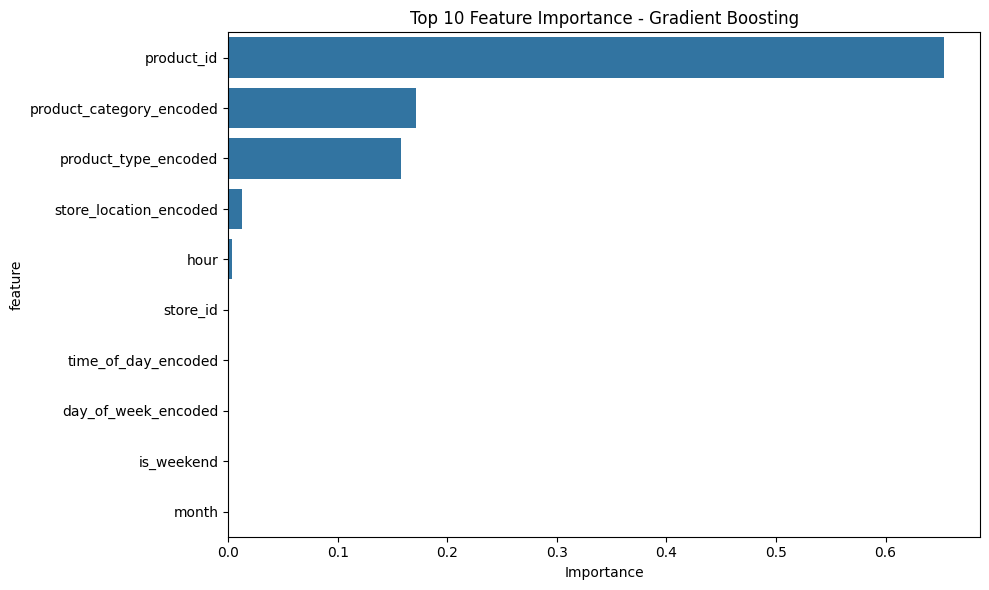

In [40]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

print(f"\nFEATURE IMPORTANCE ({best_model_name})")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title(f'Top 10 Feature Importance - {best_model_name}')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

**Insight:**
- Fitur ```product_id``` memiliki tingkat kepentingan (importance) tertinggi sebesar 65.35% yang menunjukkan bahwa identitas produk secara langsung menjadi penentu utama dalam model Gradient Boosting untuk memprediksi target. Hal ini bisa berarti bahwa model belajar pola spesifik dari produk tertentu.
- Fitur ```product_category_encoded``` (17.17%) dan product_type_encoded (15.76%) juga memberikan kontribusi penting. Ini menunjukkan bahwa kategori dan tipe produk turut memainkan peran penting dalam prediksi yang relevan jika berbagai jenis/kategori produk memiliki performa atau perilaku penjualan yang berbeda.
- Fitur-fitur terkait lokasi (```store_location_encoded``` - 1.3%) dan waktu seperti ```hour```, ```day_of_week_encoded```, ```month```, ```is_weekend```, dan ```time_of_day_encoded``` memberikan kontribusi sangat kecil bahkan ada yang mendekati nol. Ini mengindikasikan bahwa dimensi waktu dan lokasi kurang berpengaruh terhadap target yang diprediksi oleh model.
- Grafik ini menunjukkan 10 fitur paling penting dalam model Gradient Boosting untuk prediksi penjualan.
- ```product_id``` adalah fitur paling penting diikuti oleh ```product_category_encoded``` dan ```product_type_encoded``` menunjukkan bahwa karakteristik produk sangat memengaruhi penjualan.
- Fitur seperti ```store_location_encoded```, ```store_id```, dan ```time_of_day_encoded``` juga memiliki pengaruh signifikan mengindikasikan bahwa lokasi toko dan waktu transaksi penting dalam memprediksi penjualan.



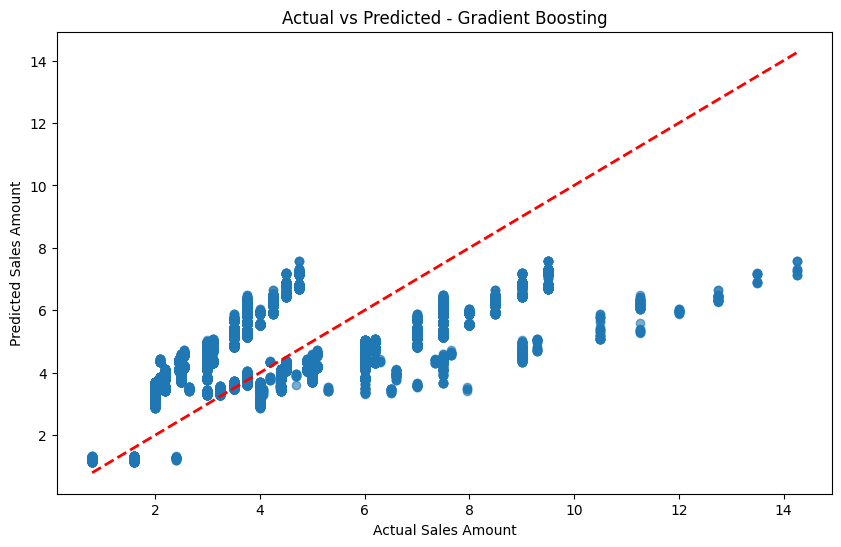

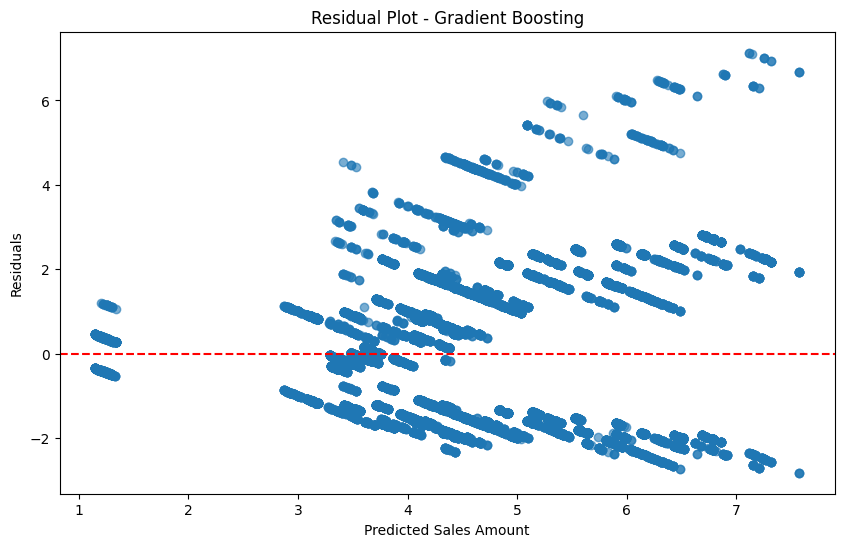

In [41]:
if best_model_name in ['Linear Regression', 'K-Neighbors']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.show()

residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales Amount')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')
plt.show()

**Insight:**
- ```if best_model_name in ['Linear Regression', 'K-Neighbors']: y_pred_best = best_model.predict(X_test_scaled)```
digunakan kondisi untuk memilih apakah akan menggunakan data uji yang telah diskalakan ```(X_test_scaled``` atau tidak ```(X_test)```. Ini mengindikasikan bahwa beberapa model seperti Linear Regression dan K-Nearest Neighbors sangat sensitif terhadap skala fitur sehingga membutuhkan data yang telah dinormalisasi atau distandarisasi agar dapat menghasilkan prediksi yang akurat.
- Model Gradient Boosting secara konsisten memprediksi jumlah penjualan lebih rendah dari nilai sebenarnya terutama untuk nilai aktual yang lebih tinggi. Sebagian besar prediksi berada di bawah garis prediksi sempurna (garis merah putus-putus) menunjukkan adanya bias sistematis dalam model.
- Residual plot ini mengevaluasi performa model Gradient Boosting dengan memplot residual (selisih antara nilai aktual dan prediksi) terhadap nilai prediksi.
- Residual tersebar secara acak di sekitar nol, yang menunjukkan bahwa model tidak memiliki bias yang jelas. Namun ada beberapa residual dengan nilai ekstrem (positif atau negatif tinggi) mengindikasikan bahwa model mungkin kurang akurat untuk beberapa data tertentu.
- Pola residual yang acak dan tidak membentuk tren tertentu adalah tanda bahwa model sudah cukup baik dalam menangkap hubungan antara fitur dan target.

In [42]:
print(f"Features used for tuning: {feature_columns}")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'min_samples_split': [10, 20, 50],
        'min_samples_leaf': [5, 10, 20],
        'max_features': ['sqrt', 'log2']
    }

    rf_tuning = RandomForestRegressor(random_state=42)

    grid_search = GridSearchCV(
        rf_tuning,
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    print("Training features:", X_train.columns.tolist())
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score (MAE): {-grid_search.best_score_:.4f}")

    tuned_model = grid_search.best_estimator_
    print("Test features:", X_test.columns.tolist())

    if list(X_train.columns) == list(X_test.columns):
        print("Feature names match!")
        y_pred_tuned = tuned_model.predict(X_test)
        tuned_r2 = r2_score(y_test, y_pred_tuned)
        tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
        tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

        y_train_pred_tuned = tuned_model.predict(X_train)
        train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
        train_mae_tuned = mean_absolute_error(y_train, y_train_pred_tuned)

        print(f"\nTuned model performance:")
        print(f"  Test R²: {tuned_r2:.4f}")
        print(f"  Test MAE: {tuned_mae:.2f}")
        print(f"  Test RMSE: {tuned_rmse:.2f}")
        print(f"  Train R²: {train_r2_tuned:.4f}")
        print(f"  Train MAE: {train_mae_tuned:.2f}")
        print(f"  Overfitting check (R² gap): {train_r2_tuned - tuned_r2:.4f}")

        if (train_r2_tuned - tuned_r2) > 0.1:
            print("Model masih menunjukkan signs of overfitting.")
        else:
            print("Model shows good generalization.")
    else:
        print("✗ Feature mismatch detected!")
        print("Train features:", list(X_train.columns))
        print("Test features:", list(X_test.columns))

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [2, 3, 4],
        'learning_rate': [0.05, 0.1, 0.15],
        'subsample': [0.8, 0.9],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [5, 10]
    }

    gb_tuning = GradientBoostingRegressor(random_state=42)

    grid_search = GridSearchCV(
        gb_tuning,
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score (MAE): {-grid_search.best_score_:.4f}")

    tuned_model = grid_search.best_estimator_
    if list(X_train.columns) == list(X_test.columns):
        y_pred_tuned = tuned_model.predict(X_test)
        tuned_r2 = r2_score(y_test, y_pred_tuned)
        tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

        print(f"Tuned model R²: {tuned_r2:.4f}")
        print(f"Tuned model MAE: {tuned_mae:.2f}")
    else:
        print("Feature mismatch in Gradient Boosting tuning!")

else:
    print(f"Hyperparameter tuning not implemented for {best_model_name}")

Features used for tuning: ['store_id', 'product_id', 'store_location_encoded', 'product_category_encoded', 'product_type_encoded', 'day_of_week_encoded', 'month', 'hour', 'is_weekend', 'time_of_day_encoded']
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'learning_rate': 0.15, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.9}
Best CV score (MAE): 1.3103
Tuned model R²: 0.3917
Tuned model MAE: 1.31


**Insight:**
- Gradient Boosting berhasil menemukan kombinasi parameter yang menghasilkan performa cukup baik (MAE rendah dan R² mendekati 0.4). Namun nilai R² yang masih di bawah 0.5 menunjukkan bahwa model bisa dikembangkan lebih lanjut baik dari sisi fitur, data preprocessing, maupun eksplorasi model yang lain.
- Tidak ditemukan mismatch fitur antara data latih dan uji sehingga prediksi berjalan lancar.

In [43]:
print(f"\nCROSS-VALIDATION SCORES")
for name, model in models.items():
    try:
        if name in ['Linear Regression', 'K-Neighbors']:
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
        else:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

        cv_mae = -cv_scores.mean()
        cv_std = cv_scores.std()

        print(f"{name}: CV MAE = {cv_mae:.2f} (+/- {cv_std*2:.2f})")
    except Exception as e:
        print(f"{name}: Error in CV - {str(e)}")


CROSS-VALIDATION SCORES
Linear Regression: CV MAE = 1.54 (+/- 0.01)
Random Forest: CV MAE = 1.35 (+/- 0.01)
Gradient Boosting: CV MAE = 1.32 (+/- 0.01)
K-Neighbors: CV MAE = 1.39 (+/- 0.01)
Decision Tree: CV MAE = 1.33 (+/- 0.01)


**Insight:**
- Berdasarkan hasil evaluasi cross-validation (CV) dengan metrik Mean Absolute Error (MAE) model Gradient Boosting menunjukkan performa terbaik dengan nilai MAE terendah yaitu 1.32 diikuti oleh Decision Tree (1.33) dan Random Forest (1.35). Ini menunjukkan bahwa model-model berbasis ensemble umumnya lebih akurat dalam memprediksi dibandingkan model linear atau instance-based.
- Model Linear Regression mencatat performa terendah (MAE tertinggi sebesar 1.54) meskipun menggunakan data yang telah diskalakan. Hal ini mengindikasikan bahwa hubungan antara fitur dan target tidak bersifat linear sehingga model yang lebih kompleks mampu menangkap pola yang lebih baik. Selain itu K-Neighbors juga memiliki MAE yang relatif lebih tinggi (1.39) meskipun datanya diskalakan kemungkinan karena sensitivitas KNN terhadap parameter dan dimensi data.

In [45]:
print("1. Produk dengan performa penjualan terbaik:")
top_products = df_model.groupby('product_category')['sales_amount'].agg(['sum', 'mean', 'count']).round(2)
top_products = top_products.sort_values('sum', ascending=False)
print(top_products)

print("\n2. Lokasi dengan penjualan tertinggi:")
top_locations = df_model.groupby('store_location')['sales_amount'].agg(['sum', 'mean', 'count']).round(2)
top_locations = top_locations.sort_values('sum', ascending=False)
print(top_locations)

print("\n3. Tren penjualan per hari:")
daily_sales = df_model.groupby('day_of_week')['sales_amount'].agg(['sum', 'mean']).round(2)
print(daily_sales)

1. Produk dengan performa penjualan terbaik:
                          sum  mean  count
product_category                          
Coffee              269918.45  4.62  58414
Tea                 196405.95  4.32  45449
Bakery               82231.19  3.61  22781
Drinking Chocolate   72416.00  6.31  11468
Flavours              8348.00  1.23   6771

2. Lokasi dengan penjualan tertinggi:
                       sum  mean  count
store_location                         
Astoria          212284.00  4.30  49364
Hell's Kitchen   209773.95  4.26  49214
Lower Manhattan  207261.64  4.48  46305

3. Tren penjualan per hari:
                  sum  mean
day_of_week                
Friday       91381.51  4.33
Monday       92033.61  4.37
Saturday     86791.95  4.35
Sunday       88383.58  4.32
Thursday     92058.46  4.37
Tuesday      88917.91  4.32
Wednesday    89752.57  4.34


**Insight:**
- Kategori produk dengan performa penjualan terbaik adalah Coffee dengan total penjualan mencapai 269,918.45 dan jumlah transaksi terbanyak (58,414 transaksi). Ini menunjukkan bahwa kopi adalah produk andalan dan paling diminati oleh pelanggan, meskipun harga rata-rata per transaksi bukan yang tertinggi.
- Lokasi dengan total penjualan tertinggi adalah Astoria dengan nilai penjualan sebesar 212,284.00. Meski bukan yang memiliki rata-rata pembelian tertinggi per transaksi, lokasi ini mencatat jumlah transaksi terbanyak (49,364) dan ini menunjukkan volume pelanggan yang tinggi.
- Tren penjualan harian relatif stabil dengan hari-hari kerja seperti Monday (92,033.61) dan Thursday (92,058.46) menunjukkan angka penjualan tertinggi. Ini mengindikasikan bahwa pelanggan lebih aktif melakukan pembelian di awal dan pertengahan minggu.

In [46]:
sample_data = X_test.iloc[:5]
if best_model_name in ['Linear Regression', 'K-Neighbors']:
    sample_predictions = best_model.predict(scaler.transform(sample_data))
else:
    sample_predictions = best_model.predict(sample_data)

print("Contoh prediksi untuk 5 data test:")
for i, pred in enumerate(sample_predictions):
    actual = y_test.iloc[i]
    print(f"  Data {i+1}: Prediksi = ${pred:.2f}, Aktual = ${actual:.2f}, Error = ${abs(pred-actual):.2f}")

Contoh prediksi untuk 5 data test:
  Data 1: Prediksi = $3.76, Aktual = $6.00, Error = $2.24
  Data 2: Prediksi = $4.66, Aktual = $3.00, Error = $1.66
  Data 3: Prediksi = $5.55, Aktual = $3.75, Error = $1.80
  Data 4: Prediksi = $3.66, Aktual = $3.75, Error = $0.09
  Data 5: Prediksi = $4.72, Aktual = $3.10, Error = $1.62


**Insight:**
- Model memberikan hasil prediksi yang cukup bervariasi terhadap 5 sampel data uji dengan error yang berkisar antara 0.09 hingga 2.24. Ini menunjukkan adanya ketidaksesuaian antara nilai prediksi dan nilai aktual pada beberapa kasus.
- Prediksi terbaik terjadi pada Data ke-4 dengan error hanya 0.09 menunjukkan bahwa model dapat memprediksi dengan akurat dalam beberapa kondisi. Namun pada Data ke-1 error mencapai 2.24 yang mengindikasikan bahwa model belum sepenuhnya stabil dalam menangani seluruh variasi data.